In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
# Load the dataset 
data = pd.read_csv(r"Dataset .csv")

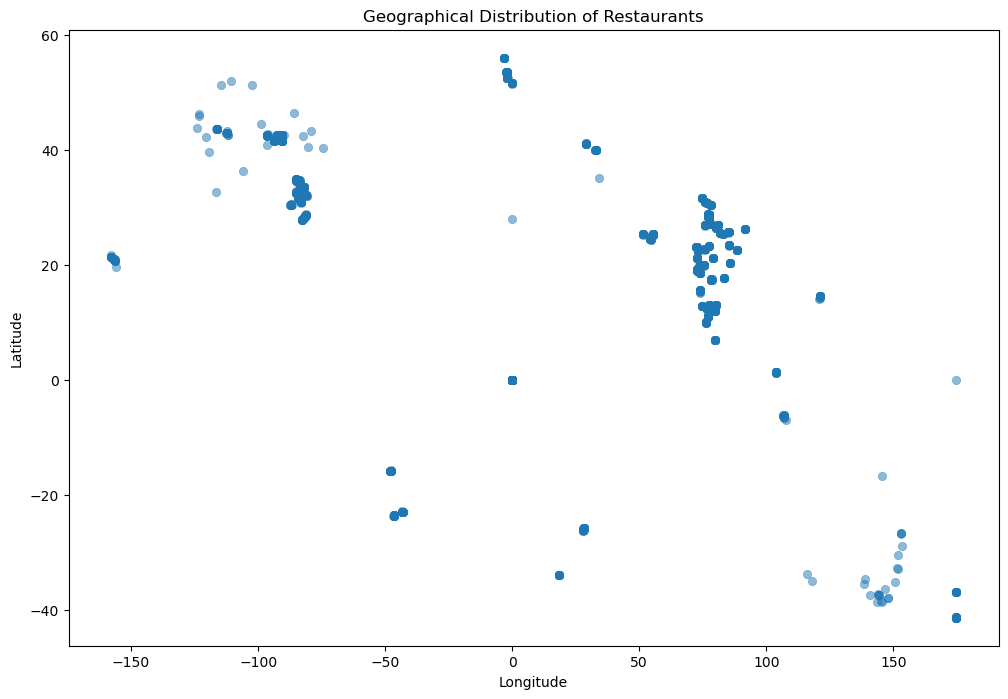

In [9]:
# Step 1: Visualize the latitude and longitude distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['Longitude'], y=data['Latitude'], alpha=0.5, edgecolor=None
)
plt.title("Geographical Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
# Step 2: Group by city and locality
city_group = data.groupby('City').size().reset_index(name='Restaurant Count')
locality_group = data.groupby('Locality').size().reset_index(name='Restaurant Count')

In [13]:
# Step 3: Calculate statistics by city
city_stats = data.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Average Cost for two': 'mean',
    'Price range': 'mean'
}).reset_index()

In [15]:
# Step 4: Identify patterns (e.g., high concentration areas)
high_concentration = city_group[city_group['Restaurant Count'] > city_group['Restaurant Count'].mean()]

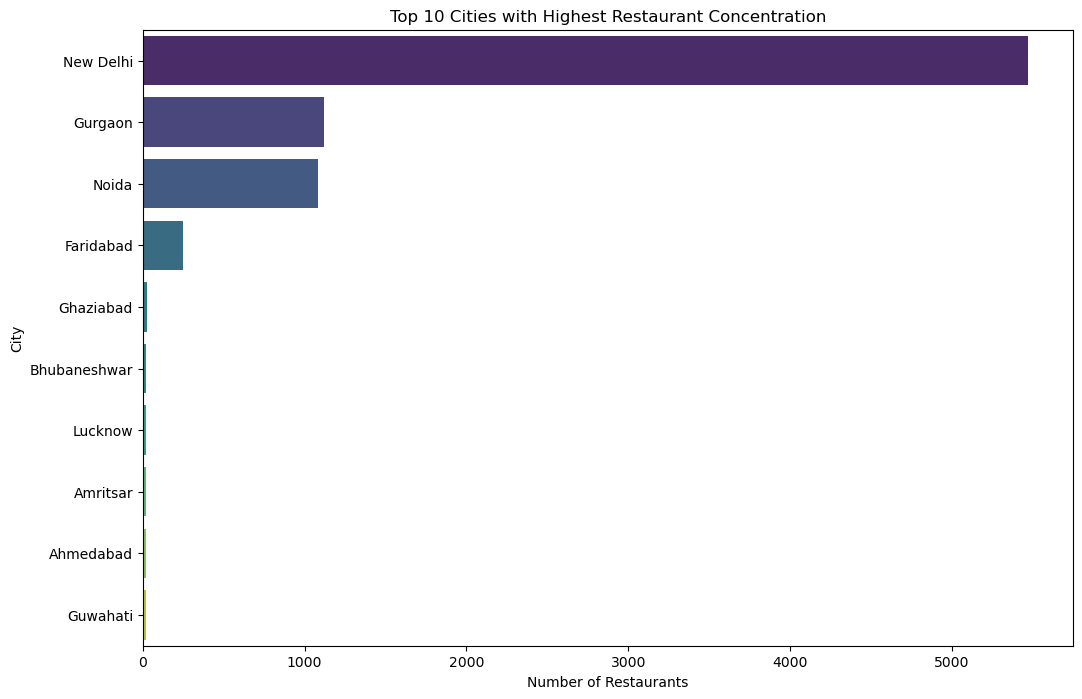

In [23]:
# Plot city concentration
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Restaurant Count', y='City',
    data=city_group.sort_values(by='Restaurant Count', ascending=False).head(10),
    palette='viridis'
)
plt.title("Top 10 Cities with Highest Restaurant Concentration")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

In [25]:
# Outputs
print("City Statistics:\n", city_stats.head())
print("High Concentration Cities:\n", high_concentration)

City Statistics:
         City  Aggregate rating  Average Cost for two  Price range
0  Abu Dhabi          4.300000            182.000000     3.300000
1       Agra          3.965000           1065.000000     2.650000
2  Ahmedabad          4.161905            857.142857     2.571429
3     Albany          3.555000             19.750000     1.700000
4  Allahabad          3.395000            517.500000     2.650000
High Concentration Cities:
          City  Restaurant Count
43  Faridabad               251
50    Gurgaon              1118
88  New Delhi              5473
89      Noida              1080
